# DESKRIPSI PROYEK

Tujuan : Membuat analisa perilaku client dan menentukan paket pra bayar mana yang lebih banyak mendatangkan pendapatan

Company detail : 

Megaline adalah perusahaan operator telekomunikasi, yang memiliki dua paket prabayar yaitu paket Surf dan Ultimate.
   
Paket Prabayar Surf :
   - Biaya bulanan 20 USD
   - 500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
   - Setelah melebihi batas paket, akan dikenakan:
   - 1 menit: 3 sen
   - 1 SMS: 3 sen
   - 1 GB data: 10 USD

Paket Prabayar Ultimate :
   - Biaya bulanan: 70 USD
   - 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
   - Setelah melebihi batas paket, akan dikenakan:
       - 1 menit: 1 sen
       - 1 SMS: 1 sen
       - 1 GB data: 7 USD
       
Catatan : 
   - Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. 
   - setiap panggilan individual dibulatkan ke atas, walaupun hanya satu detik, ia akan dihitung sebagai satu menit. 
   - setiap sesi web tidak dibulatkan ke atas. Tetapi, total untuk sebulan dibulatkan ke atas (ex. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita)
   - sample data klien Megaline = 500
   - perlu analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil
   - akan dicari tau siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018.



## Buka file data dan mempelajari informasi umumnya

File path:
- /datasets/megaline_calls.csv 
- /datasets/megaline_internet.csv 
- /datasets/megaline_messages.csv 
- /datasets/megaline_plans.csv 
- /datasets/megaline_users.csv 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

import warnings
warnings.filterwarnings ('ignore')

In [2]:
#panggil dataset
df_call = pd.read_csv('/datasets/megaline_calls.csv')
df_inet = pd.read_csv('/datasets/megaline_internet.csv')
df_msg = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


### call data

In [3]:
#info dataset call
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
#tampilan 5 dataset call
df_call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
#cek duplikasi dataset call
df_call.duplicated().sum()

0

In [6]:
#cek data kosong di datasetcall
df_call.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [7]:
#cek deskripsi dataset call
df_call.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


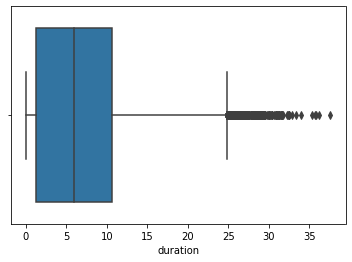

In [8]:
#cek boxplot pada kolom duration
sns.boxplot(df_call['duration']);

Catatan dataset Call :

- tidak ditemukan data yang aneh/mencurigakan
- tidak ada data yang hilang
- tidak ada data yang duplikat
- tipe data call_date  menggunakan object
- tidak ada outlier di kolom 'duration'


### duration data

In [9]:
#info dataset internet
df_inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
#tampilan 5 dataset internet
df_inet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [11]:
#cek duplikasi dataset internet
df_inet.duplicated().sum()

0

In [12]:
#cek data kosong di dataset internet
df_inet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [13]:
#cek deskripsi dataset internet
df_inet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


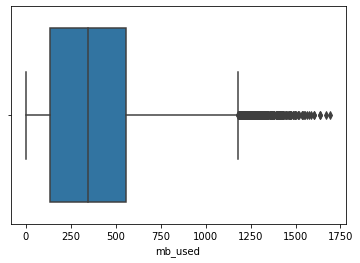

In [14]:
#cek boxplot pada kolom mb_used
sns.boxplot(df_inet['mb_used']);

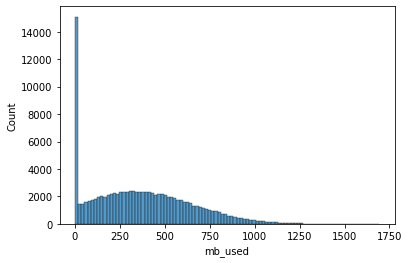

In [15]:
#cek pola histogram pada kolom 'mb_used'
sns.histplot(df_inet['mb_used']);

Catatan dataset Internet :

- ditemukan data yang aneh/mencurigakan yaitu mb_used = 0
- tidak ada data yang hilang
- tidak ada data yang duplikat
- tipe data session_date menggunakan object
- tidak ada outlier pada kolom 'mb_user'

### message data

In [16]:
#info dataset message
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
#tampilan 5 dataset message
df_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
#cek duplikasi dataset message
df_msg.duplicated().sum()

0

In [19]:
#cek data kosong di dataset message
df_msg.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [20]:
#cek deskripsi dataset message
df_msg.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Catatan dari dataset Message :
- tidak ditemukan data yang aneh/mencurigakan
- tidak ada data yang hilang
- tidak ada data yang duplikat
- tipe data message_date menggunakan object

### plans data

In [21]:
#info dataset plans
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [22]:
#tampilan dataset plans
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [23]:
#cek duplikasi dataset plans
df_plans.duplicated().sum()

0

In [24]:
#cek data kosong di dataset plans
df_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [25]:
#cek deskripsi dataset plans
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Catatan dataset plans :
- tidak ditemukan data yang aneh/mencurigakan
- tidak ada data yang hilang
- tidak ada data yang duplikat
- tipe data sudah sesuai

### users data

In [26]:
#info dataset users
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [27]:
#tampilan dataset users
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [28]:
#cek duplikasi dataset users
df_users.duplicated().sum()

0

In [29]:
#cek data kosong di dataset users
df_users.isnull().sum().sort_values(ascending = False)

churn_date    466
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
dtype: int64

In [30]:
#cek deskripsi dataset users
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Catatan dataset users :

- terdapat data yang hilang sejumlah 466 pada kolom churn_date
- tidak ditemukan data yang aneh/mencurigakan
- tidak ada data yang duplikat
- tipe data reg_date menggunakan object
- tipe data curn_date menggunakan object
- sesuai kebutuhan analisa, kota yang dipakai adalah NY-NJ, sisanya di bersihkan

## Menyiapkan Data

Dari hasil mempelajari data pada tahap ke-1 sebelumnya di dapatkan beberapa hal yang harus ditindaklanjuti sbb :

- terdapat data yang hilang sejumlah 466 pada kolom churn_date pada dataset users
- ditemukan data yang aneh/mencurigakan yaitu mb_used = 0 pada dataset internet.
- tipe data kolom call_date menggunakan object pada dataset Call
- tipe data kolom session_date menggunakan object pada dataset Internet
- tipe data kolom message_date menggunakan object pada dataset Message
- tipe data kolom reg_date menggunakan object pada dataset Users
- tipe data kolom curn_date menggunakan object pada dataset Users
- sesuai kebutuhan analisa, kota yang dipakai adalah NY-NJ, sisanya di bersihkan

selanjutnya kita akan tangani kedua kondisi diatas, yaitu :

- kolom yang hilang pada churn_date akan diisi dengan 'on_service' karena nilai hilang disini artinya paket layanan sedang digunakan
- untuk data aneh pada dataset internet di kolom 'mb_used' = 0, jika dilihat dalam histogram posisinya adalah di awal data dan jumlah nya besar, suspect nya adalah panggilan tidak terjawab, sehingga kita akan hilangkan pada analisa data selanjutnya
- merubah tipe data kolom call_date dari object ke format date time pada dataset Call
- merubah tipe data kolom session_date dari object ke format date time pada dataset Internet
- merubah tipe data kolom message_date dari object ke format date time pada dataset Message
- merubah tipe data kolom reg_date dari object ke format date time pada dataset Users
- sesuai kebutuhan analisa, kota yang dipakai adalah NY-NJ, sisanya di bersihkan

setelah itu kita akan mencari: 
- Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
- Jumlah SMS yang dikirim per bulan
- Volume data per bulan
- Pendapatan bulanan dari setiap pengguna (dengan cara mengurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kemudian mengalikan hasilnya dengan nilai paket telepon; dan tambahkan biaya bulanan tergantung pada paket teleponnya)

In [31]:
#mengisi nilai hilang pada kolom churn_date di dataset users
df_users['churn_date']= df_users['churn_date'].fillna('on_service')
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,on_service
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,on_service
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,on_service
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,on_service
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,on_service


In [32]:
#cek data kosong di dataset users
df_users.isnull().sum().sort_values(ascending = False)

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

<AxesSubplot:xlabel='mb_used', ylabel='Count'>

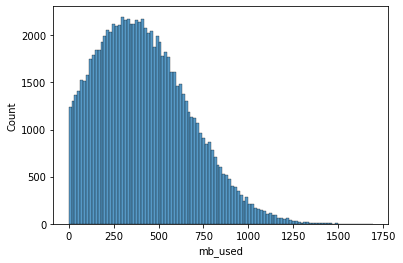

In [33]:
#menghilangkan nilai 0 pada kolom mb_used
df_inet = df_inet[(df_inet['mb_used']>0)]
sns.histplot(df_inet['mb_used'])

In [34]:
df_call

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [35]:
# - merubah tipe data kolom call_date dari object ke format date time pada dataset Call
df_call['call_date'] = pd.to_datetime(df_call['call_date'])

In [36]:
# - merubah tipe data kolom session_date dari object ke format date time pada dataset Internet
df_inet['session_date'] = pd.to_datetime(df_inet['session_date'])

In [37]:
# - merubah tipe data kolom message_date dari object ke format date time pada dataset Message
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'])

In [38]:
# - merubah tipe data kolom reg_date dari object ke format date time pada dataset Users
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

setelah itu kita akan mencari: 
- Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
- Volume data per bulan
- Jumlah SMS yang dikirim per bulan
- Pendapatan bulanan dari setiap pengguna (dengan cara mengurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kemudian mengalikan hasilnya dengan nilai paket telepon; dan tambahkan biaya bulanan tergantung pada paket teleponnya)

### mencari jumlah panggilan yang dilakukan perbulan

In [39]:
df_call

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [40]:
#membuat kolom year_month  --> karena diminta analisa adalah per bulan
df_call['year_month'] = pd.to_datetime(df_call['call_date']).dt.to_period('M').astype(str)


In [41]:
#membulatkan keatas kolom duration
df_call['duration_round'] = df_call['duration'].apply(np.ceil).astype('int')
df_call.tail()

,id,user_id,call_date,duration,year_month,duration_round
137730,1499_199,1499,2018-11-21,8.72,2018-11,9
137731,1499_200,1499,2018-10-20,10.89,2018-10,11
137732,1499_201,1499,2018-09-21,8.12,2018-09,9
137733,1499_202,1499,2018-10-10,0.37,2018-10,1
137734,1499_203,1499,2018-12-29,13.86,2018-12,14


In [42]:
#mencari jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
df_call_agg = df_call.groupby(['user_id','year_month']).agg({'duration_round' : 'sum'}).reset_index()
df_call_agg

,user_id,year_month,duration_round
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
...,...,...,...
2253,1498,2018-12,339
2254,1499,2018-09,346
2255,1499,2018-10,385
2256,1499,2018-11,308


### mencari volume data/internet perbulan

In [43]:
#cek dataset internet
df_inet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
...,...,...,...,...
104819,1499_214,1499,2018-10-18,261.13
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75


In [44]:
#membuat kolom year_month  --> karena diminta analisa adalah per bulan
df_inet['year_month'] = pd.to_datetime(df_inet['session_date']).dt.to_period('M').astype(str)


In [45]:
#mencari jumlah data internet yang digunakan per bulan
df_inet_agg = df_inet.groupby(['user_id','year_month']).agg({'mb_used' : 'sum'}).reset_index()
df_inet_agg

,user_id,year_month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [46]:
#convert to gigabite
df_inet_agg['gb_used'] = df_inet_agg['mb_used']/1024

In [47]:
#membulatkan keatas kolom mb_used
df_inet_agg['gb_used_round'] = df_inet_agg['gb_used'].apply(np.ceil).astype('int')
df_inet_agg

,user_id,year_month,mb_used,gb_used,gb_used_round
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-08,6919.15,6.756982,7
2,1001,2018-09,13314.82,13.002754,14
3,1001,2018-10,22330.49,21.807119,22
4,1001,2018-11,18504.30,18.070605,19
...,...,...,...,...,...
2272,1498,2018-12,23137.69,22.595400,23
2273,1499,2018-09,12984.76,12.680430,13
2274,1499,2018-10,19492.43,19.035576,20
2275,1499,2018-11,16813.83,16.419756,17


<AxesSubplot:xlabel='gb_used_round', ylabel='Density'>

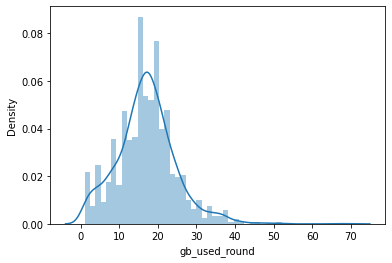

In [48]:
#cek distribusi
sns.distplot(df_inet_agg['gb_used_round'])

### mencari jumlah sms perbulan

In [49]:
#cek dataset message
df_msg

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [50]:
#membuat kolom year_month  --> karena diminta analisa adalah per bulan
df_msg['year_month'] = pd.to_datetime(df_msg['message_date']).dt.to_period('M').astype(str)

In [51]:
#mencari jumlah sms yang dilakukan per bulan
df_msg_agg = df_msg.groupby(['user_id','year_month']).agg({'id' : 'count'}).reset_index().rename(columns={'id':'msg_count'})
df_msg_agg

,user_id,year_month,msg_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


<AxesSubplot:xlabel='msg_count', ylabel='Density'>

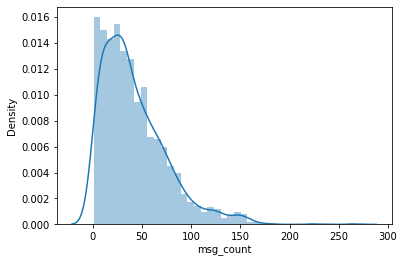

In [52]:
#cek distribusi message
sns.distplot(df_msg_agg['msg_count'])

### Pendapatan bulanan dari setiap pengguna (dengan cara mengurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kemudian mengalikan hasilnya dengan nilai paket telepon; dan tambahkan biaya bulanan tergantung pada paket teleponnya)

In [53]:
#cek dataset df_call_agg
df_call_agg.head()

,user_id,year_month,duration_round
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [54]:
#cek dataset df_inet_agg
df_inet_agg.head()

,user_id,year_month,mb_used,gb_used,gb_used_round
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-08,6919.15,6.756982,7
2,1001,2018-09,13314.82,13.002754,14
3,1001,2018-10,22330.49,21.807119,22
4,1001,2018-11,18504.30,18.070605,19


In [55]:
#cek dataset df_msg_agg
df_msg_agg.head()

,user_id,year_month,msg_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [56]:
#lakukan penggabungan data di tabel call dan internet 
df_merge1 = pd.merge(df_call_agg,df_inet_agg, on = ['user_id','year_month'], how ='outer')

In [57]:
#cek nilai null pada tabel gabungan df_merge1
df_merge1.isnull().sum()

user_id            0
year_month         0
duration_round    34
mb_used           15
gb_used           15
gb_used_round     15
dtype: int64

In [58]:
#isi nilai null dengan 0
df_merge1 = df_merge1.fillna(0)
df_merge1.head()

,user_id,year_month,duration_round,mb_used,gb_used,gb_used_round
0,1000,2018-12,124.0,1901.47,1.856904,2.0
1,1001,2018-08,182.0,6919.15,6.756982,7.0
2,1001,2018-09,315.0,13314.82,13.002754,14.0
3,1001,2018-10,393.0,22330.49,21.807119,22.0
4,1001,2018-11,426.0,18504.30,18.070605,19.0


In [59]:
#lakukan penggabungan data di tabel df_merge1 dengan tabel message
df_merge2 = pd.merge(df_merge1,df_msg_agg, on = ['user_id','year_month'], how ='outer')
df_merge2.isnull().sum()

user_id             0
year_month          0
duration_round      1
mb_used             1
gb_used             1
gb_used_round       1
msg_count         487
dtype: int64

In [60]:
#isi nilai null dengan 0
df_merge2 = df_merge2.fillna(0)
df_merge2.head()

,user_id,year_month,duration_round,mb_used,gb_used,gb_used_round,msg_count
0,1000,2018-12,124.0,1901.47,1.856904,2.0,11.0
1,1001,2018-08,182.0,6919.15,6.756982,7.0,30.0
2,1001,2018-09,315.0,13314.82,13.002754,14.0,44.0
3,1001,2018-10,393.0,22330.49,21.807119,22.0,53.0
4,1001,2018-11,426.0,18504.30,18.070605,19.0,36.0


In [61]:
#hapus kolom yang tidak digunakan
df_merge2 = df_merge2.drop(columns=['mb_used','gb_used'])

In [62]:
df_merge2

,user_id,year_month,duration_round,gb_used_round,msg_count
0,1000,2018-12,124.0,2.0,11.0
1,1001,2018-08,182.0,7.0,30.0
2,1001,2018-09,315.0,14.0,44.0
3,1001,2018-10,393.0,22.0,53.0
4,1001,2018-11,426.0,19.0,36.0
...,...,...,...,...,...
2288,1349,2018-10,0.0,13.0,76.0
2289,1349,2018-11,0.0,17.0,72.0
2290,1349,2018-12,0.0,13.0,61.0
2291,1361,2018-05,0.0,2.0,2.0


In [63]:
#menggabungkan tabel df_plan dan df_user
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [64]:
#merubah mb_per_month_included menjadi gigabite
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [65]:
#cek dataset user
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,on_service
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,on_service
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,on_service
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,on_service
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,on_service


In [66]:
#menggabungkan table users denga table plans
df_merge3 = pd.merge(df_users,df_plans,left_on = 'plan', right_on = 'plan_name')

In [67]:
df_merge3.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [68]:
#gabung semua tabel (df_merge2 dan df_merge3)
df_merge_all = pd.merge(df_merge2,df_merge3, on=['user_id'],how='inner')
#cek ukuran masing-masing dataset
df_merge_all.shape,df_merge2.shape, df_merge3.shape

((2293, 21), (2293, 5), (500, 17))

In [69]:
#cek dataset gabungan
df_merge_all.head(3)

,user_id,year_month,duration_round,gb_used_round,msg_count,first_name,last_name,age,city,reg_date,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,2018-08,182.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,on_service,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,2018-09,315.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,on_service,50,15360,500,20,10,0.03,0.03,surf,15.0


In [70]:
#buat kolom baru untuk cek status ny_nj pada kolom city
df_merge_all['is_ny_nj'] = df_merge_all['city'].str.contains('NY-NJ',regex=True)
df_merge_all.tail(3)

,user_id,year_month,duration_round,gb_used_round,msg_count,first_name,last_name,age,city,reg_date,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj
2290,1349,2018-10,0.0,13.0,76.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,50,15360,500,20,10,0.03,0.03,surf,15.0,False
2291,1349,2018-11,0.0,17.0,72.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,50,15360,500,20,10,0.03,0.03,surf,15.0,False
2292,1349,2018-12,0.0,13.0,61.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,50,15360,500,20,10,0.03,0.03,surf,15.0,False


In [71]:
#buang kolom yang tidak perlu
df_merge_all = df_merge_all.drop(columns=['first_name','last_name','churn_date','mb_per_month_included','plan','reg_date'])

In [72]:
#cek dataset
df_merge_all.head()

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj
0,1000,2018-12,124.0,2.0,11.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,3000,70,7,0.01,0.01,ultimate,30.0,False
1,1001,2018-08,182.0,7.0,30.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False
2,1001,2018-09,315.0,14.0,44.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False
3,1001,2018-10,393.0,22.0,53.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False
4,1001,2018-11,426.0,19.0,36.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False


In [73]:
#menghitung pendapatan perbulan

#membuat fungsi untuk calculate extra price
def extra_price (value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value >0:
        return cost_extra * extra_value
    else:
        return 0


In [74]:
#extra_price internet
df_merge_all['extra_inet'] = df_merge_all.apply(lambda row:extra_price(value=row['gb_used_round'], max_value=row['gb_per_month_included'], cost_extra=row['usd_per_gb']), axis=1)
#extra_price call
df_merge_all['extra_call'] = df_merge_all.apply(lambda row:extra_price(value=row['duration_round'], max_value=row['minutes_included'], cost_extra=row['usd_per_minute']), axis=1)
#extra_price msg
df_merge_all['extra_msg'] = df_merge_all.apply(lambda row:extra_price(value=row['msg_count'], max_value=row['messages_included'], cost_extra=row['usd_per_message']), axis=1)
# total extra_price
df_merge_all['total_extra_cost'] = df_merge_all['extra_inet'] + df_merge_all['extra_call'] + df_merge_all['extra_msg']
# total revenue
df_merge_all['total_revenue'] = df_merge_all['total_extra_cost'] + df_merge_all['usd_monthly_pay'] 
#cek dataset
df_merge_all.head()

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj,extra_inet,extra_call,extra_msg,total_extra_cost,total_revenue
0,1000,2018-12,124.0,2.0,11.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.00,0.00,70.00
1,1001,2018-08,182.0,7.0,30.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,0.0,0.0,0.00,0.00,20.00
2,1001,2018-09,315.0,14.0,44.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,0.0,0.0,0.00,0.00,20.00
3,1001,2018-10,393.0,22.0,53.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,70.0,0.0,0.09,70.09,90.09
4,1001,2018-11,426.0,19.0,36.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,40.0,0.0,0.00,40.00,60.00


## Analisa data
Menjelaskan perilaku konsumen :
- Mencari jumlah menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan. 
- Menghitung rata-rata, varians, dan standar deviasinya. 
- Membuat histogram. menjelaskan distribusinya.

### Mencari jumlah menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan.


In [75]:
#membuat dataset terpisah untuk masing masing paket
df_merge_all_surf = df_merge_all[df_merge_all['plan_name'] == 'surf'].reset_index(drop=True)
df_merge_all_ultimate = df_merge_all[df_merge_all['plan_name'] == 'ultimate'].reset_index(drop=True)


In [76]:
#dataset paket surf
df_merge_all_surf.tail(2)

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj,extra_inet,extra_call,extra_msg,total_extra_cost,total_revenue
1571,1349,2018-11,0.0,17.0,72.0,69,"Boston-Cambridge-Newton, MA-NH MSA",50,500,20,...,0.03,0.03,surf,15.0,False,20.0,0.0,0.66,20.66,40.66
1572,1349,2018-12,0.0,13.0,61.0,69,"Boston-Cambridge-Newton, MA-NH MSA",50,500,20,...,0.03,0.03,surf,15.0,False,0.0,0.0,0.33,0.33,20.33


In [77]:
#dataset paket ultimate
df_merge_all_ultimate.tail()

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj,extra_inet,extra_call,extra_msg,total_extra_cost,total_revenue
715,1493,2018-12,473.0,15.0,0.0,18,"Boston-Cambridge-Newton, MA-NH MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
716,1497,2018-12,300.0,11.0,50.0,49,"Los Angeles-Long Beach-Anaheim, CA MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
717,1108,2018-12,0.0,1.0,0.0,45,"Salt Lake City, UT MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
718,1204,2018-11,0.0,21.0,42.0,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
719,1204,2018-12,0.0,36.0,78.0,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,42.0,0.0,0.0,42.0,112.0


### Menghitung rata-rata, varians, dan standar deviasinya.

In [78]:
#Menghitung rata-rata, varians, dan standar deviasinya setiap paket dari data durasi telpon
pd.pivot_table(df_merge_all, index='plan_name', values = 'duration_round', aggfunc = ['mean',np.var,np.std])

,mean,var,std
,duration_round,duration_round,duration_round
plan_name,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


In [79]:
#Menghitung rata-rata, varians, dan standar deviasinya setiap paket dari data internet
pd.pivot_table(df_merge_all, index='plan_name', values = 'gb_used_round', aggfunc = ['mean',np.var,np.std])

,mean,var,std
,gb_used_round,gb_used_round,gb_used_round
plan_name,,,
surf,16.670693,61.58360,7.847522
ultimate,17.306944,58.83055,7.670108


In [80]:
#Menghitung rata-rata, varians, dan standar deviasinya jumlah pesan
pd.pivot_table(df_merge_all, index='plan_name', values = 'msg_count', aggfunc = ['mean',np.var,np.std])

,mean,var,std
,msg_count,msg_count,msg_count
plan_name,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


### Membuat histogram, menjelaskan distribusinya.

#### Distribusi pendapatan perbulan

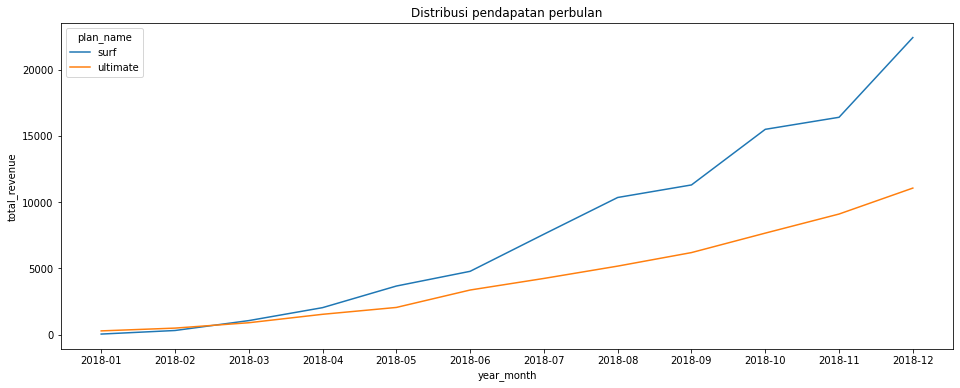

In [81]:
#cek distribusi pendapatan tiap paket perbulan
plt.figure(figsize =(16,6))
plt.title('Distribusi pendapatan perbulan')
income = df_merge_all.groupby(['plan_name','year_month']).sum()['total_revenue'].reset_index()

sns.lineplot(data = income, x='year_month', y='total_revenue', hue = 'plan_name')
plt.show()


In [82]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   plan_name      24 non-null     object 
 1   year_month     24 non-null     object 
 2   total_revenue  24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 704.0+ bytes


In [83]:
#cek ukuran dataset
df_merge_all_surf.shape, df_merge_all_ultimate.shape

((1573, 21), (720, 21))

#### apakah ada hubungan antara paket dan usia pengguna

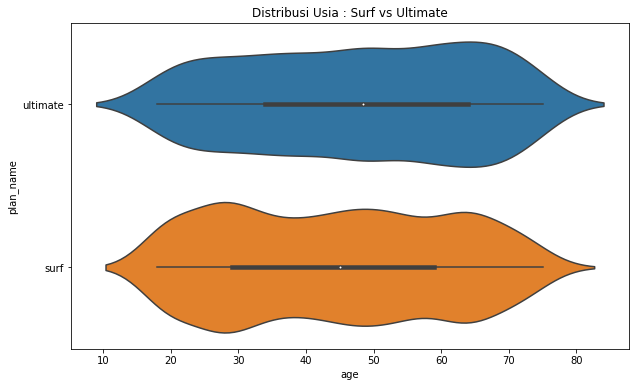

,plan_name,age
0,surf,44.379530
1,ultimate,47.719444


In [84]:
#cek distribusi hubungan antara paket dan usia pengguna
plt.figure (figsize =(10,6))
plt.title('Distribusi Usia : Surf vs Ultimate')
sns.violinplot(data=df_merge_all, x='age', y = 'plan_name')
plt.show()
df_merge_all.groupby(['plan_name']).mean()['age'].reset_index()

#### apakah semakin tua pengguna pendapatan makin naik

In [107]:
#cek distribusi apakah semakin tua pendapatan paket makin besar
age_vs_income = df_merge_all.groupby(['user_id','age']).sum()['total_revenue'].reset_index()

plt.figure(figsize =(10,6))
plt.title('Age vs Income')
sns.scatterplot(data=age_vs_income, x='age', y = 'total_revenue')
plt.show()

,user_id,age,total_revenue
0,1000,45,70.00
1,1001,28,250.09
2,1002,36,100.00
3,1003,52,158.12
4,1004,40,610.00
...,...,...,...
485,1495,67,473.30
486,1496,49,140.00
487,1497,49,70.00
488,1498,51,850.00


#### distribusi panggilan telepon setiap bulan

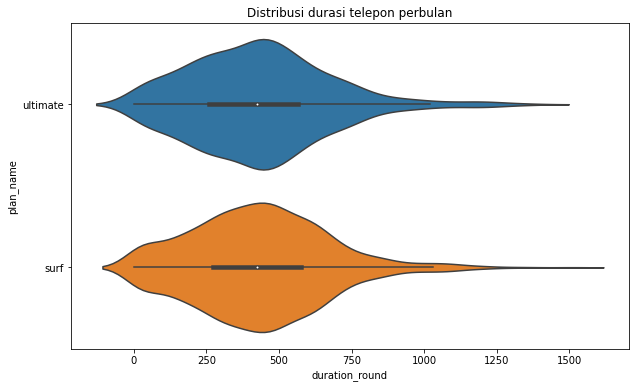

In [86]:
#membuat plot distribusi berdasarkan durasi panggilan
plt.figure(figsize =(10,6))
plt.title('Distribusi durasi telepon perbulan')
sns.violinplot(data=df_merge_all, x='duration_round', y = 'plan_name')
plt.show()

#### distribusi penggunaan internet setiap bulan

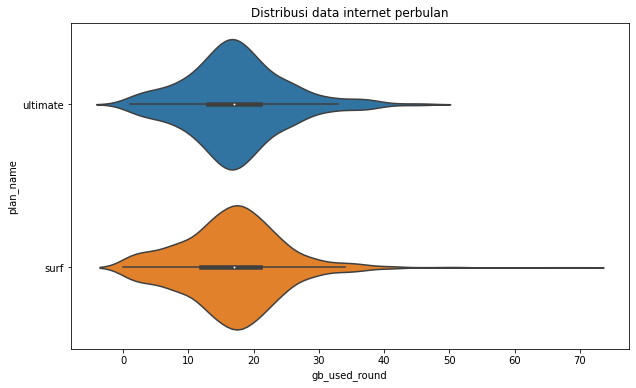

In [87]:
#membuat plot distribusi berdasarkan penggunaan internet
plt.figure(figsize =(10,6))
plt.title('Distribusi data internet perbulan')
sns.violinplot(data=df_merge_all, x='gb_used_round', y = 'plan_name')
plt.show()

 #### distribusi penggunaan pesan setiap bulan

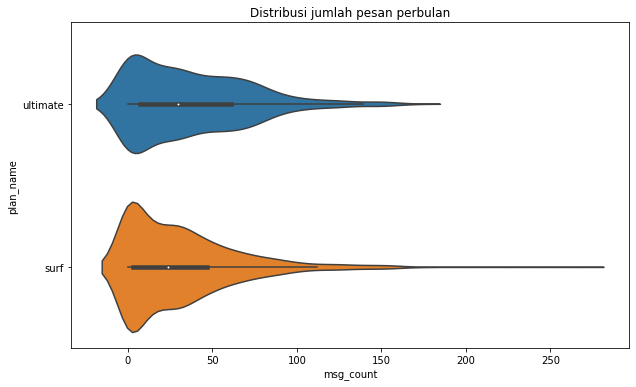

In [88]:
#membuat plot distribusi berdasarkan jumlah pesan
plt.figure(figsize =(10,6))
plt.title('Distribusi jumlah pesan perbulan')
sns.violinplot(data=df_merge_all, x='msg_count', y = 'plan_name')
plt.show()

####  seberapa banyak orang yang membayar extra cost setiap bulan

In [89]:
#total pengguna berdasarkan paket
df_merge_all.groupby(['plan_name']).count()['user_id']


plan_name
surf        1573
ultimate     720
Name: user_id, dtype: int64

##### extra cost internet

In [90]:
#jumlah pengguna yang membayar extra cost internet
df_merge_all.loc[df_merge_all.extra_inet>0].groupby(['plan_name']).count()['user_id']

plan_name
surf        911
ultimate     41
Name: user_id, dtype: int64

In [91]:
#persentase orang yang membayar extra internet
df_merge_all.loc[df_merge_all.extra_inet>0].groupby(['plan_name']).count()['user_id']/df_merge_all.groupby(['plan_name']).count()['user_id']*100

plan_name
surf        57.914812
ultimate     5.694444
Name: user_id, dtype: float64

In [92]:
#nilai rata-rata extra internet untuk masing-masing paket
df_merge_all.loc[df_merge_all.extra_inet>0].groupby(['plan_name']).mean()['extra_inet']

plan_name
surf        66.739846
ultimate    40.634146
Name: extra_inet, dtype: float64

##### extra cost telepon

In [93]:
#jumlah pengguna yang membayar extra cost telepon
df_merge_all.loc[df_merge_all.extra_call>0].groupby(['plan_name']).count()['user_id']

plan_name
surf    566
Name: user_id, dtype: int64

In [94]:
#hitung persentase orang yang membayar extra telepon
df_merge_all.loc[df_merge_all.extra_call>0].groupby(['plan_name']).count()['user_id']/df_merge_all.groupby(['plan_name']).count()['user_id']*100


plan_name
surf        35.9822
ultimate        NaN
Name: user_id, dtype: float64

In [95]:
#nilai rata-rata extra telepon untuk masing-masing paket
df_merge_all.loc[df_merge_all.extra_call>0].groupby(['plan_name']).mean()['extra_call']

plan_name
surf    5.124117
Name: extra_call, dtype: float64

##### extra cost message

In [96]:
#jumlah pengguna yang membayar extra cost message
df_merge_all.loc[df_merge_all.extra_msg>0].groupby(['plan_name']).count()['user_id']

plan_name
surf    340
Name: user_id, dtype: int64

In [97]:
#hitung persentase orang yang membayar extra message
df_merge_all.loc[df_merge_all.extra_msg>0].groupby(['plan_name']).count()['user_id']/df_merge_all.groupby(['plan_name']).count()['user_id']*100

plan_name
surf        21.614749
ultimate          NaN
Name: user_id, dtype: float64

In [98]:
#nilai rata-rata extra message untuk masing-masing paket
df_merge_all.loc[df_merge_all.extra_msg>0].groupby(['plan_name']).mean()['extra_msg']

plan_name
surf    0.973324
Name: extra_msg, dtype: float64

### kesimpulan sementara

- Findings :
 - Distribusi pendapatan perbulan
   - pada awal bulan revenuw paket ultimate lebih besar daripada paket surf
   - selanjutnya setelah bulan ke-2 revenue paket surf melampaui paket ultimate
   - di akhir tahun revenue paket surf jauh diatas meninggalkan paket ultimate
   - pengguna jumlah paket surf 2x lipat lebih banyak dibanding pengguna paket ultimate
 - Hubungan paket dan usia pengguna
   - Rata - rata umur pengguna paket surf dan ultimate tidak berbeda jauh yaitu paket surf 44,3 dan paket ultimate 47.7
   - Pengguna paket surf lebih banyak anak muda usia 20-30, sedangaka ultimate banyak digunakan usia tua antara 60-70
 - Apakah semakin tua umur pengguna pendapatan semakin naik
   - pola scatterplot terlihat acak
   - menyebar merata dari muda sampai tua
 - Distribusi panggilan telepon setiap bulan
   - rata-rata panggilan antara paket surf dan ultimate hampir sama yaitu 428,7 pada paket surf dan 430,4 pada paket ultimate
   - pola distribusi paket surf dan ultimate adalah mirip / hampir sama
 - Distribusi penggunaan internet setiap bulan
   - rata-rata penggunaan antara paket surf dan ultimate hampir sama yaitu 16,6 pada paket surf dan 17,3 pada paket ultimate
   - pola distribusi paket surf dan ultimate adalah mirip / hampir sama
 - Distribusi jumlah pesan setiap bulan
   - rata-rata penggunaan pesan paket surf dan ultimate hampir sama yaitu 31,1 pada paket surf dan 37,5 pada paket ultimate
   - pola distribusi paket surf dan ultimate adalah mirip / hampir sama, namun terlihat lebih lebar karena jumlah pengguna paket surf2x lipat pengguna paket ultimate
 - extra cost yang dibayarkan pengguna
   - extra cost internet :
      - dibayarkan oleh 911 orang atau 58 % pengguna paket surf dan 41 orang atau 5.7%  pengguna paket ultimate
      - rata-rata extra cost yang dibayarkan adalah 66,7 usd pada paket surf dan 40,6 usd pada paket ultimate
   - extra cost telepon :
      - dibayar oleh 566 orang atau 36% pengguna paket surf
      - rata-rata nilai extra cost telepon untuk paket surf adalah 5.12 usd
      - tidak ada pengguna paket ultimate yang membayar extra cost telepon
   - extra cost message
      - dibayar oleh 340 orang atau 21.6 % pengguna paket surf
      - rata-rata nilai extra cost telepon untuk paket surf adalah 0.97 usd
      - tidak ada pengguna paket ultimate yang membayar extra cost message

- Insight :
    - potensi revenue paket surf lebih besar daripada paket ultimate dikarenakan jumlah pengguna surf 2x lipat pengguna paket ultimate
    - paket surf lebih diminati anak muda
    - paket ultimate banyak diminati orang yang lebih tua / mapan
    - tidak ditemukan pola bahwa semakin tua revenue makin besar
    - harga paket surf walaupun cukup murah yaitu 20usd tapi 58% user membayar extra cost sebesar 66.7 usd
    - di plan ultimate hanya sedikit yang membayar extra cost itupun nilainya tidak sebesar pada paket surf
    - para pengguna ultimate tidak memliki extra cost untuk telepon dan message
- Recomendation
    - membuat produk diatas surf dan dibawah paket ultimate
    - membuat paket dengan ekstra internet untuk user
    - memperbaiki paket ultimate sehingga memungkinkan pengguna memiliki extra cost khususnya pada telepon dan message
    

### Uji hipotesisnya

#### Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

note :
- numerical vs numerical
- methode : Independent T-Test
- Hipotesis :
 - H0 (null Hypothesis) = Rata-rata pendapatan dari pengguna paket telepon ultimate dan surf adalah SAMA
 - H1 (Alternative Hypothesis) = Rata-rata pendapatan dari pengguna paket telepon ultimate dan surf adalah TIDAK SAMA
- alpha = 0.05

In [99]:
def verdict (p_value, alpha = 0.05):
    print ('P-Value:',p_value)
    if p_value < alpha:
        print ('H1 Accepted / H0 Rejected')
    else :
        print ('H0 Accepted / H1 Rejected')

In [100]:
paket_ulti = df_merge_all.loc[(df_merge_all.plan_name == 'ultimate') & ~(df_merge_all.gb_used_round.isna()),'gb_used_round']

paket_surf = df_merge_all.loc[(df_merge_all.plan_name == 'surf') & ~(df_merge_all.gb_used_round.isna()),'gb_used_round']

In [101]:
paket_ulti.var(), paket_surf.var()

(58.830549760469786, 61.58359983759012)

In [102]:
paket_ulti.mean(), paket_surf.mean()

(17.306944444444444, 16.670692943420217)

In [103]:
p_value2 = ttest_ind(paket_ulti,paket_surf,equal_var=True).pvalue
verdict(p_value2)

P-Value: 0.06970837213503832
H0 Accepted / H1 Rejected


#### Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

note : 
- category vs category
- methode : Chi-square
- Hipotesis:
 - H0 = tidak ada hubungan antara kota ny-nj dengan penggunaan paket
 - H1 = ada hubungan antara kota ny-nj dengan penggunaan paket
 
- alpha = 0.05

In [104]:
#menyiapkan data
data_cityplan = pd.pivot_table(df_merge_all, index='plan_name', columns = 'is_ny_nj', values='user_id', aggfunc='nunique')
data_cityplan

is_ny_nj,False,True
plan_name,,
surf,273,60
ultimate,138,19


In [105]:
p_value = chi2_contingency(data_cityplan)[1]
verdict(p_value)

P-Value: 0.12598168052885783
H0 Accepted / H1 Rejected


#### kesimpulan uji hipotesis

- Findings :
 - rata-rata pendapatan dari penggunaan paket Surf dan Ultimate adalah SAMA
 - nilai rata-rata serta varians paket Surf dan Ultimate tidak berbeda signifikan
 - rata-rata paket surf adalah melebihi kuota sedangkan paket ultimate dibawah kuota
 - tidak ada hubungan kota ny-nj terhadap penggunaan paket
- Insight :
 - anak muda memerlukan kuota yang lebih besar dari kapasitas paket surf
 - perilaku konsumen tidak dipengaruhi oleh kota dan nilai rata-rata pendapatan dari masing masing paket adalah sama
- Recomendation :
 - membuat paket middle yaitu antara paket surf dan ultimate

### Tulis kesimpulannya secara menyeluruh

kesimpulan umum : 
- apapun jenis paket yang digunakan, perilaku pengguna secara umum adalah sama
- paket Surf lebih banyak mendatangkan keuntungan

- Findings :
 - Distribusi pendapatan perbulan
   - pada awal bulan revenuw paket ultimate lebih besar daripada paket surf
   - selanjutnya setelah bulan ke-2 revenue paket surf melampaui paket ultimate
   - di akhir tahun revenue paket surf jauh diatas meninggalkan paket ultimate
   - pengguna jumlah paket surf 2x lipat lebih banyak dibanding pengguna paket ultimate
 - Hubungan paket dan usia pengguna
   - Rata - rata umur pengguna paket surf dan ultimate tidak berbeda jauh yaitu paket surf 44,3 dan paket ultimate 47.7
   - Pengguna paket surf lebih banyak anak muda usia 20-30, sedangaka ultimate banyak digunakan usia tua antara 60-70
 - Apakah semakin tua umur pengguna pendapatan semakin naik
   - pola scatterplot terlihat acak
   - menyebar merata dari muda sampai tua
 - Distribusi panggilan telepon setiap bulan
   - rata-rata panggilan antara paket surf dan ultimate hampir sama yaitu 428,7 pada paket surf dan 430,4 pada paket ultimate
   - pola distribusi paket surf dan ultimate adalah mirip / hampir sama
 - Distribusi penggunaan internet setiap bulan
   - rata-rata penggunaan antara paket surf dan ultimate hampir sama yaitu 16,6 pada paket surf dan 17,3 pada paket ultimate
   - pola distribusi paket surf dan ultimate adalah mirip / hampir sama
 - Distribusi jumlah pesan setiap bulan
   - rata-rata penggunaan pesan paket surf dan ultimate hampir sama yaitu 31,1 pada paket surf dan 37,5 pada paket ultimate
   - pola distribusi paket surf dan ultimate adalah mirip / hampir sama, namun terlihat lebih lebar karena jumlah pengguna paket surf2x lipat pengguna paket ultimate
 - extra cost yang dibayarkan pengguna
   - extra cost internet :
      - dibayarkan oleh 911 orang atau 58 % pengguna paket surf dan 41 orang atau 5.7%  pengguna paket ultimate
      - rata-rata extra cost yang dibayarkan adalah 66,7 usd pada paket surf dan 40,6 usd pada paket ultimate
   - extra cost telepon :
      - dibayar oleh 566 orang atau 36% pengguna paket surf
      - rata-rata nilai extra cost telepon untuk paket surf adalah 5.12 usd
      - tidak ada pengguna paket ultimate yang membayar extra cost telepon
   - extra cost message
      - dibayar oleh 340 orang atau 21.6 % pengguna paket surf
      - rata-rata nilai extra cost telepon untuk paket surf adalah 0.97 usd
      - tidak ada pengguna paket ultimate yang membayar extra cost message
 - kesimpulan uji hipotesis
  - rata-rata pendapatan dari penggunaan paket Surf dan Ultimate adalah SAMA
  - nilai rata-rata serta varians paket Surf dan Ultimate tidak berbeda signifikan
  - rata-rata paket surf adalah melebihi kuota sedangkan paket ultimate dibawah kuota
  - tidak ada hubungan kota ny-nj terhadap penggunaan paket

- Insight :
    - potensi revenue paket surf lebih besar daripada paket ultimate dikarenakan jumlah pengguna surf 2x lipat pengguna paket ultimate
    - paket surf lebih diminati anak muda
    - paket ultimate banyak diminati orang yang lebih tua / mapan
    - tidak ditemukan pola bahwa semakin tua revenue makin besar
    - harga paket surf walaupun cukup murah yaitu 20usd tapi 58% user membayar extra cost sebesar 66.7 usd
    - di plan ultimate hanya sedikit yang membayar extra cost itupun nilainya tidak sebesar pada paket surf
    - para pengguna ultimate tidak memliki extra cost untuk telepon dan message
    - anak muda memerlukan kuota yang lebih besar dari kapasitas paket surf
    - perilaku konsumen tidak dipengaruhi oleh kota dan nilai rata-rata pendapatan dari masing masing paket adalah sama
- Recomendation
    - membuat produk diatas surf dan dibawah paket ultimate / paket middle
    - membuat paket dengan ekstra internet untuk user
    - memperbaiki paket ultimate sehingga memungkinkan pengguna memiliki extra cost khususnya pada telepon dan message

    